# House Price Prediction using Linear & Logistic Regression

## 1. Data Generation
## 2. Exploratory Analysis
## 3. Linear Regression – Price Prediction
## 4. Evaluation (MAE, MSE, R2)
## 5. Logistic Regression – Expensive Classification
## 6. Evaluation (Accuracy, Confusion Matrix, ROC-AUC)
## 7. Conclusion


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [3]:
np.random.seed(42)

##features
data = pd.DataFrame({
    "area": np.random.randint(500, 3000, 100),      
    "bedrooms": np.random.randint(1, 5, 100),
    "location_score": np.random.randint(1, 10, 100)
})






In [4]:
# Target: house price
data["price"] = (
    data["area"] * 50 +
    data["bedrooms"] * 100000 +
    data["location_score"] * 20000 +
    np.random.randint(-50000, 50000, 100)
)
data.head()

,area,bedrooms,location_score,price
0,1360,2,3,339135
1,1794,1,8,349808
2,1630,4,6,645679
3,1595,3,8,580022
4,2138,3,9,575367


In [5]:
X = data[["area","bedrooms","location_score"]]
y = data['price']
X

,area,bedrooms,location_score
0,1360,2,3
1,1794,1,8
2,1630,4,6
3,1595,3,8
4,2138,3,9
...,...,...,...
95,2588,3,9
96,2682,1,2
97,700,2,2
98,2363,1,2


In [6]:
model = LinearRegression()
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [7]:
model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

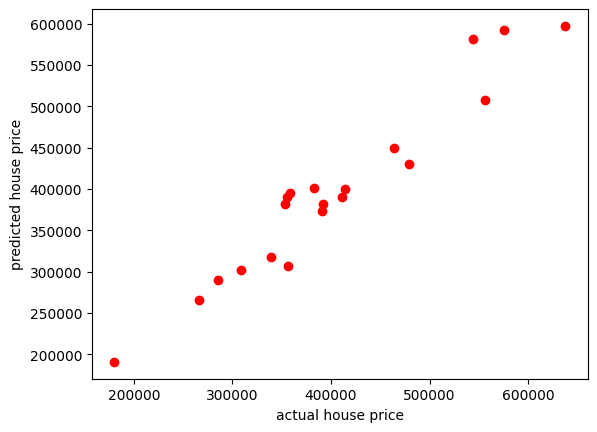

In [14]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel('actual house price')
plt.ylabel('predicted house price')
plt.show()

In [16]:
print(f"MAE :{mean_absolute_error(y_test,y_pred)}")
print(f"MSE :{mean_squared_error(y_test,y_pred)}")
print(f"r2_score :{r2_score(y_test,y_pred)}")

MAE :24109.79905840719
MSE :809584240.6880558
r2_score :0.9332321336935402


In [33]:
data['expensive'] =( data['price']>=400000).astype(int)
data[['price','expensive']].head()

,price,expensive
0,339135,0
1,349808,0
2,645679,1
3,580022,1
4,575367,1


In [34]:
X = data[["area","bedrooms","location_score"]]
Y = data['expensive']
    

In [66]:
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
model2=LogisticRegression()
model2.fit(X_train,Y_train)

LogisticRegression()

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model2.fit(X_train,Y_train)

In [67]:
Y_pred = model2.predict(X_test)

In [68]:
##Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Y_test,Y_pred)

0.85

In [69]:
confusion_matrix(Y_test,Y_pred)

array([[11,  1],
       [ 2,  6]])

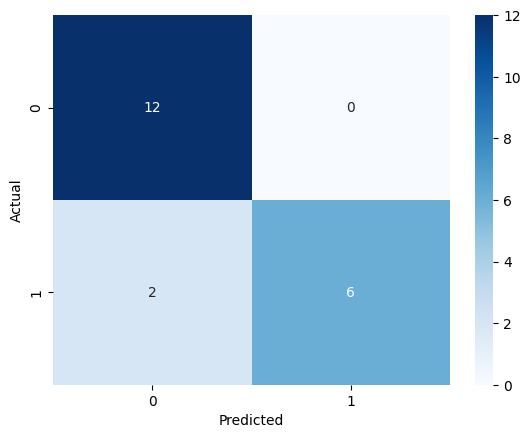

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [60]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



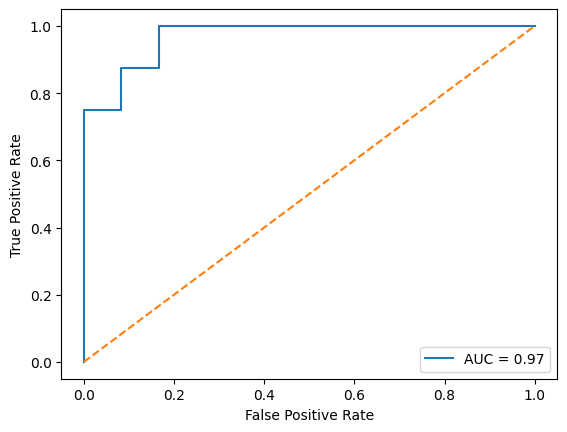

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model2.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [64]:
y_pred_custom = (y_prob > 0.4).astype(int)

y_pred_custom

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])